In [141]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rnd
import seaborn as sns

In [23]:
relative_path = os.path.abspath("")
original_data_train_path = os.path.join(relative_path, "original_data", "train", "train")
original_data_test_path = os.path.join(relative_path, "original_data", "test", "test")

print(f"{relative_path=}")
print(f"{original_data_train_path=}")

relative_path='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab'
original_data_train_path='/Users/dp/Documents/GitHub/Deep-learning-Daniel-Petersson/lab/original_data/train/train'


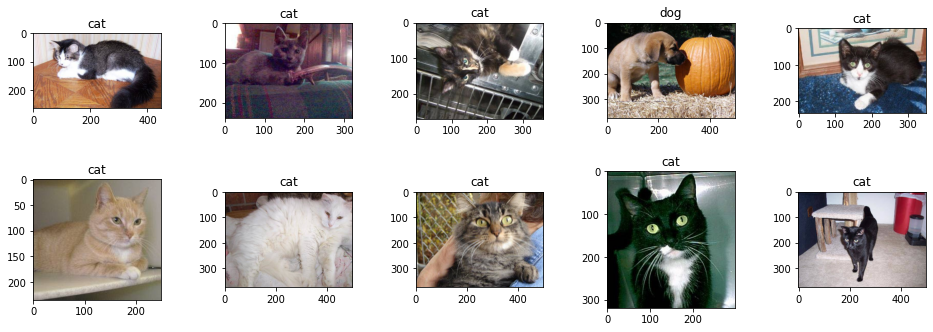

In [24]:
rnd.seed(42)

image_names = os.listdir(original_data_train_path)

fig, axes = plt.subplots(2, 5, figsize = (16, 8))

for ax, image_name in zip(axes.flatten(), rnd.sample(image_names, 10)):
    image = plt.imread(f"{original_data_train_path}{os.sep}{image_name}")
    ax.imshow(image)
    ax.set_title(image_name.split(".")[0])

plt.subplots_adjust(wspace = 0.5, hspace = -0.5, bottom = 0)
plt.show()

In [25]:
parents = ["experiment_small_data", "experiment_tiny_data"]
children = ["train", "val", "test"]

for parent in parents:
    try:
        os.mkdir(f"{relative_path}{os.sep}{parent}")
    except FileExistsError as err:
        print(err)
    for child in children:
        try:
            os.mkdir(f"{relative_path}{os.sep}{parent}{os.sep}{child}")
        except FileExistsError as err:
            print(err)

In [26]:
import shutil

def get_label(filename):
    return filename.split(".")[0]

def get_cats_dogs(filenames, n):
    cats, dogs = [], []
    files_to_move = []

    for filename in filenames:
        if get_label(filename) == "cat":
            cats.append(filename)
        else:
            dogs.append(filename)
    
    files_to_move += rnd.sample(dogs, n // 2) + rnd.sample(cats, n // 2)

    return files_to_move


def move_files(filenames, n, source, target):
    files_to_move = get_cats_dogs(filenames, n)

    for filename in files_to_move:
        shutil.copy(f"{source}{os.sep}{filename}", f"{target}{os.sep}{filename}")

    for filename in files_to_move:
        filenames.remove(filename)

    return filenames

train_images_list = os.listdir(original_data_train_path)

number_of_files = [1600, 400, 500, 160, 40, 50]
targets = [f"{parent}{os.sep}{child}" for parent in parents for child in children]

for n, target in zip(number_of_files, targets):
        train_images_list = move_files(train_images_list, n, original_data_train_path, f"{relative_path}{os.sep}{target}")

for path in targets:
    print(f"Files in {path}: {len(os.listdir(path))}")


25000
22250
Files in experiment_small_data/train: 1600
Files in experiment_small_data/val: 400
Files in experiment_small_data/test: 500
Files in experiment_tiny_data/train: 160
Files in experiment_tiny_data/val: 40
Files in experiment_tiny_data/test: 50


In [154]:
rnd.seed(42)

images = {}
labels = {}

datasets = [target[11:].replace("_data/", "_") for target in targets]

for dataset, path in zip(datasets, targets):
    file_list = os.listdir(f"{relative_path}{os.sep}{path}")
    rnd.shuffle(file_list)
    images[dataset] = []
    labels[dataset] = []

    for file in file_list:
        images[dataset] += [plt.imread(f"{relative_path}{os.sep}{path}{os.sep}{file}")]
        labels[dataset] += [get_label(file)]
    
    labels[dataset] = np.array([1 if label == "cat" else 0 for label in labels[dataset]])

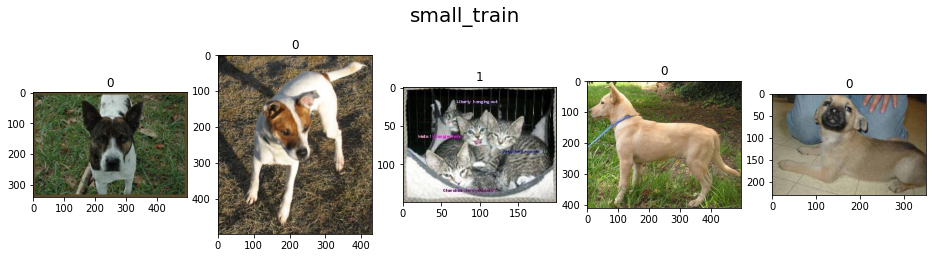

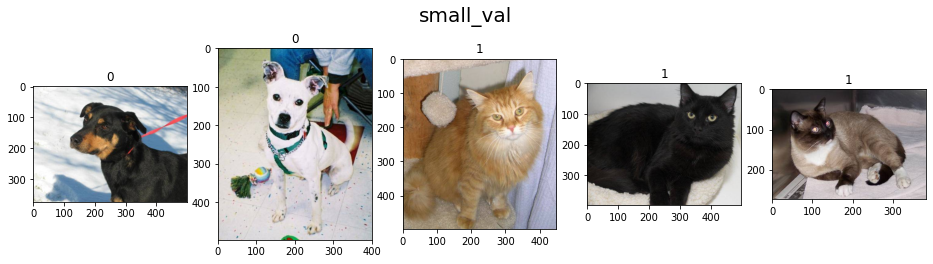

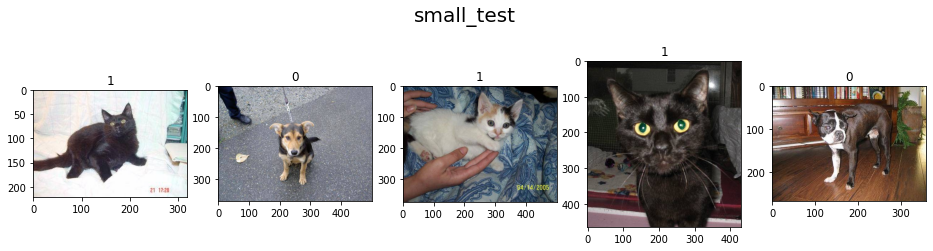

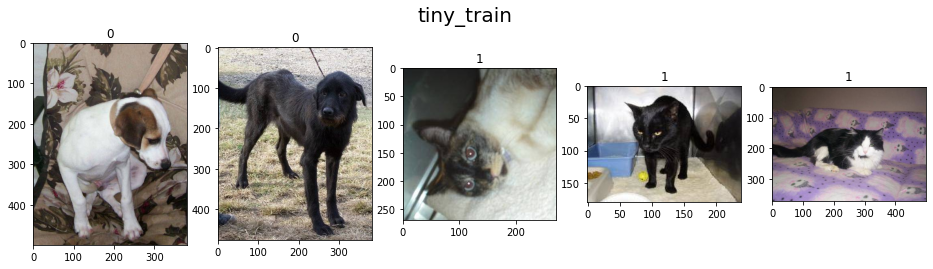

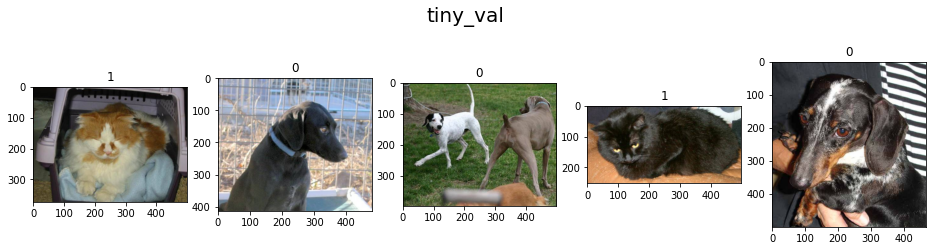

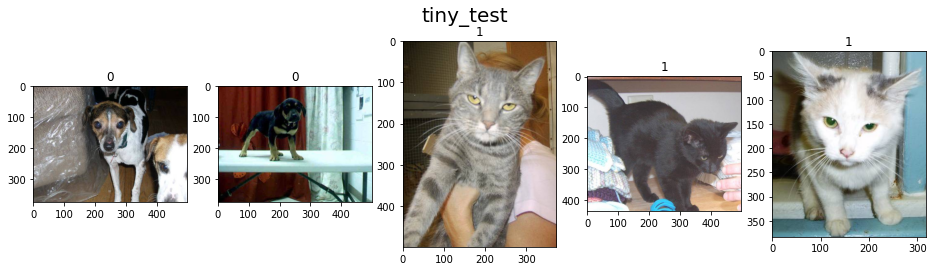

In [155]:
rnd.seed(42)

def plot_images_from_jpg(images, labels, suptitle = None):
    fig, axes = plt.subplots(1, 5, figsize = (16, 4))

    for ax, image, label in zip(axes.flatten(), images[:5], labels[:5]):
        ax.imshow(image)
        ax.set_title(label)
    
    if suptitle:
        fig.suptitle(suptitle, fontsize = 20)
    
    plt.show()

for dataset in datasets:
    plot_images_from_jpg(images[dataset], labels[dataset], dataset)

In [157]:
def balanced(labels, dataset):
    print(f"Dataset {dataset} balance: {np.sum(labels) / len(labels)}")

for dataset in datasets:
    balanced(labels[dataset], dataset)

Dataset small_train balance: 0.5
Dataset small_val balance: 0.5
Dataset small_test balance: 0.5
Dataset tiny_train balance: 0.5
Dataset tiny_val balance: 0.5
Dataset tiny_test balance: 0.5


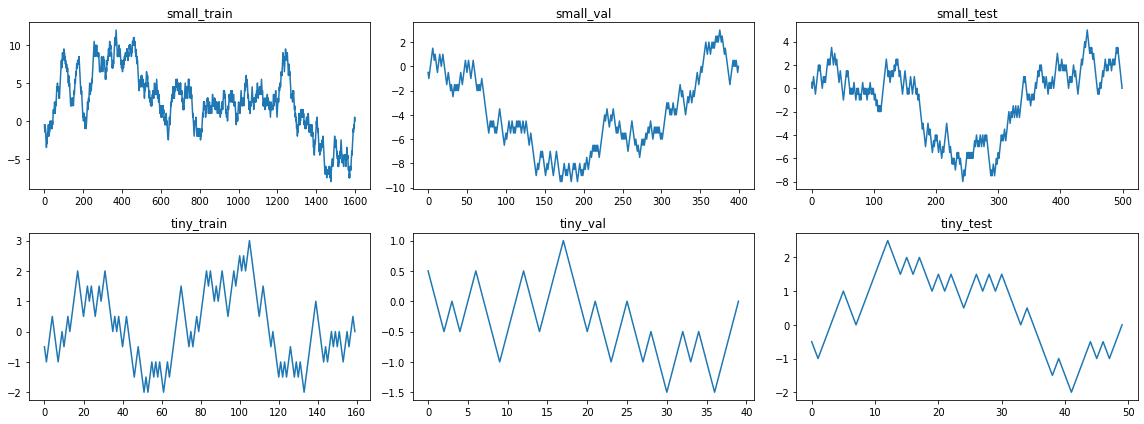

In [169]:
fig, axes = plt.subplots(2, len(datasets) // 2, figsize = (16, 6))

for ax, dataset in zip(axes.flatten(), datasets):
    ax.plot(np.cumsum(labels[dataset] - 0.5))
    ax.set_title(dataset)

fig.tight_layout()
plt.show()


In [170]:
datasets

['small_train',
 'small_val',
 'small_test',
 'tiny_train',
 'tiny_val',
 'tiny_test']

<AxesSubplot:ylabel='aspect_ratio'>

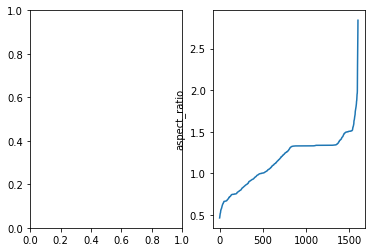

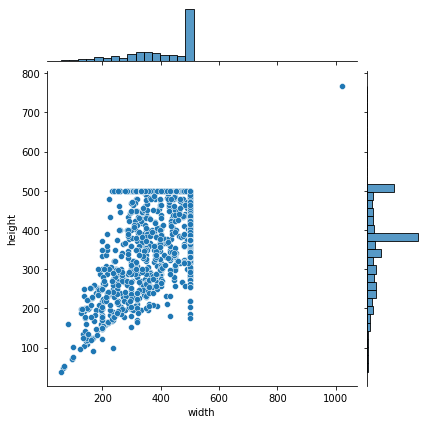

In [193]:
# [0] höjd, [1] bredd


image_heights = [image.shape[0] for image in images[datasets[0]]]
image_widths = [image.shape[1] for image in images[datasets[0]]]
image_labels = [label for label in labels[datasets[0]]]

df_dim = pd.DataFrame({"height": image_heights, "width": image_widths, "label": image_labels})

df_dim["aspect_ratio"] = df_dim["width"] / df_dim["height"]

fig, ax = plt.subplots(1, 2)
ax = ax.flatten()
sns.jointplot(data = df_dim, x = "width", y = "height", ax = ax[0])
sns.lineplot(data = df_dim.sort_values(by = "aspect_ratio").reset_index(), x = df_dim.index, y = "aspect_ratio", ax = ax[1])

In [173]:
labels[dataset[4]]

{'small_train': array([0, 0, 1, ..., 1, 1, 0]),
 'small_val': array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0